<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

# üìì Regresi√≥n Lineal: De la Teor√≠a a la Pr√°ctica

Este notebook es una gu√≠a completa para entender la regresi√≥n lineal desde sus fundamentos. Empezaremos con el an√°lisis de la relaci√≥n entre variables, construiremos modelos simples y los haremos progresivamente m√°s complejos, evaluando siempre su rendimiento y validando sus supuestos te√≥ricos.

**Dataset Propuesto: `Advertising.csv`**
Usaremos un dataset cl√°sico sobre publicidad. Contiene el presupuesto de publicidad en TV, Radio y Peri√≥dico, y las ventas resultantes. Es ideal porque es f√°cil de entender y permite ilustrar todos los conceptos de regresi√≥n.

  * **TV**: Gasto en publicidad por TV (en miles de USD).
  * **Radio**: Gasto en publicidad por Radio (en miles de USD).
  * **Newspaper**: Gasto en publicidad por Peri√≥dico (en miles de USD).
  * **Sales**: Ventas de un producto (en miles de unidades).

**Nuestra meta:** Predecir `Sales` bas√°ndonos en el gasto en publicidad.

-----

### **Paso 0: Configuraci√≥n Inicial**

Primero, importemos las librer√≠as que usaremos y carguemos nuestros datos.


In [1]:
# Librer√≠as para manipulaci√≥n y an√°lisis de datos
import pandas as pd
import numpy as np

# Librer√≠as para visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Librer√≠as de Scikit-Learn para modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Configuraci√≥n para que los gr√°ficos se muestren en el notebook
%matplotlib inline

In [2]:
# Cargar el dataset desde una URL
archivo = 'Advertising.csv'
data = pd.read_csv(archivo, index_col=0)

# Echemos un primer vistazo
print("Primeras 5 filas del dataset:")
display(data.head())

print("\nInformaci√≥n general y tipos de datos:")
data.info()

print("\nEstad√≠sticas descriptivas:")
display(data.describe())

Primeras 5 filas del dataset:


TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


Informaci√≥n general y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB

Estad√≠sticas descriptivas:


TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

## 1\. Dependencia de Variables (An√°lisis Exploratorio) üìä

Antes de construir cualquier modelo, debemos entender nuestros datos. ¬øExiste alguna relaci√≥n entre el gasto en publicidad y las ventas? La visualizaci√≥n es clave.

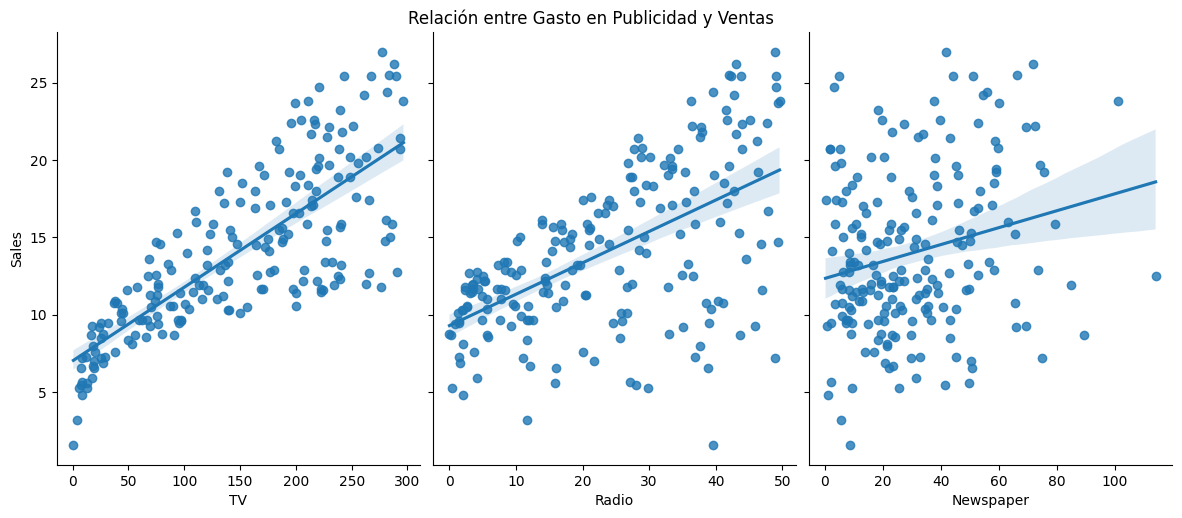

In [3]:
# Usamos pairplot de seaborn para visualizar las relaciones entre todas las variables
# y la distribuci√≥n de cada una.
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8, kind='reg')
plt.suptitle('Relaci√≥n entre Gasto en Publicidad y Ventas', y=1.02)
plt.show()

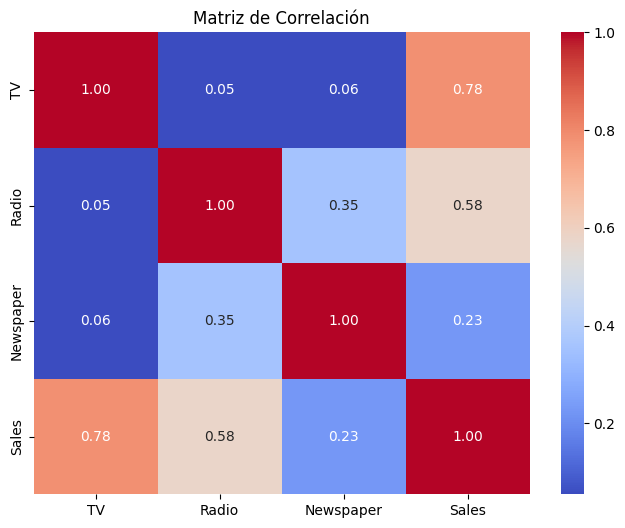

In [4]:
# Tambi√©n podemos cuantificar esta relaci√≥n usando una matriz de correlaci√≥n.
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaci√≥n')
plt.show()


### ü§î **Preguntas para Discusi√≥n:**

1.  Observando los gr√°ficos y la matriz de correlaci√≥n, ¬øqu√© variable predictora (`TV`, `Radio`, `Newspaper`) parece tener la relaci√≥n m√°s fuerte y lineal con las `Sales`?
2.  La relaci√≥n entre `Newspaper` y `Sales` parece m√°s d√©bil y dispersa. ¬øQu√© nos dice esto sobre su posible utilidad como predictor?
3.  ¬øExisten correlaciones notables entre las propias variables predictoras (ej. entre `Radio` y `Newspaper`)? ¬øPor qu√© esto podr√≠a ser importante m√°s adelante?

-----

respuestas aqui

## 2\. Supuestos Te√≥ricos del Modelo de Regresi√≥n Lineal üìù

Un modelo de regresi√≥n lineal (conocido como OLS - *Ordinary Least Squares*) es confiable solo si se cumplen ciertos supuestos sobre los datos y los errores del modelo (residuos). Los m√°s importantes son (acr√≥nimo **L.I.N.E.**):

1.  **Linealidad (L):** La relaci√≥n entre las variables predictoras y la variable objetivo debe ser lineal. (Ya lo exploramos visualmente en el paso 1).
2.  **Independencia (I):** Los residuos (los errores de predicci√≥n) deben ser independientes entre s√≠. Es decir, el error de una observaci√≥n no debe influir en el error de otra.
3.  **Normalidad (N):** Los residuos deben seguir una distribuci√≥n normal. Esto es importante para las pruebas de hip√≥tesis sobre los coeficientes.
4.  **Homocedasticidad (E - Equal Variance):** La varianza de los residuos debe ser constante a lo largo de todos los niveles de las variables predictoras. En otras palabras, la dispersi√≥n de los errores debe ser la misma para valores peque√±os y grandes de los predictores.

No podemos verificar todos estos supuestos a√∫n, pero los tendremos en mente y **volveremos a ellos** despu√©s de construir nuestro primer modelo.

### ü§î **Preguntas para Discusi√≥n:**

1.  ¬øQu√© podr√≠a pasar si la relaci√≥n no es lineal y aun as√≠ ajustamos un modelo lineal? ¬øC√≥mo se ver√≠a el gr√°fico de residuos?
2.  Piensa en un ejemplo donde los residuos NO ser√≠an independientes (ej. datos de series de tiempo como el precio de una acci√≥n d√≠a a d√≠a).

-----

respuestas aqui

## 3\. Regresi√≥n Lineal Simple üìà

Comencemos con el caso m√°s sencillo: predecir las ventas usando **solo una** variable predictora. Bas√°ndonos en nuestro an√°lisis, `TV` es el mejor candidato.

**Modelo a estimar:** $Sales = \theta_0 + \theta_1 \times TV$

In [5]:
# 1. Definir nuestras variables X e y
X = data[['TV']]
y = data['Sales']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Esto es CRUCIAL para evaluar si nuestro modelo generaliza bien a datos nuevos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# 4. Ver los par√°metros estimados
print(f"Ordenada al origen (Œ∏‚ÇÄ): {model_simple.intercept_:.4f}")
print(f"Coeficiente para TV (Œ∏‚ÇÅ): {model_simple.coef_[0]:.4f}")

Ordenada al origen (Œ∏‚ÇÄ): 7.2395
Coeficiente para TV (Œ∏‚ÇÅ): 0.0464



**Visualicemos el modelo ajustado:**


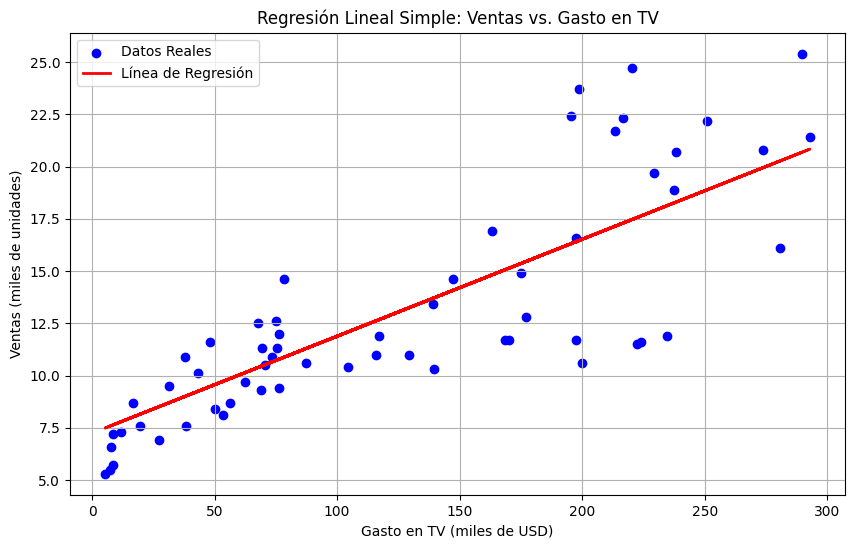

In [6]:
# 5. Visualizar la l√≠nea de regresi√≥n sobre los datos de prueba
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, model_simple.predict(X_test), color='red', linewidth=2, label='L√≠nea de Regresi√≥n')
plt.title('Regresi√≥n Lineal Simple: Ventas vs. Gasto en TV')
plt.xlabel('Gasto en TV (miles de USD)')
plt.ylabel('Ventas (miles de unidades)')
plt.legend()
plt.grid(True)
plt.show()


**Ahora, verifiquemos los supuestos (Normalidad y Homocedasticidad de los residuos):**


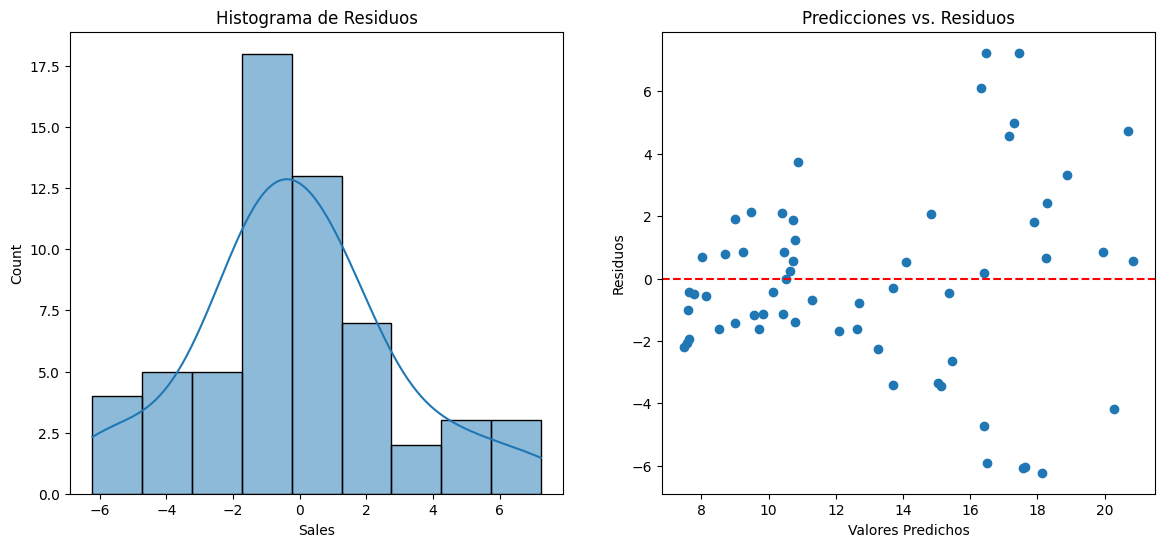

In [7]:
# 6. Calcular los residuos en el conjunto de prueba
residuos = y_test - model_simple.predict(X_test)

# Gr√°fico de Normalidad (Histograma)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True)
plt.title('Histograma de Residuos')

# Gr√°fico de Homocedasticidad
plt.subplot(1, 2, 2)
plt.scatter(model_simple.predict(X_test), residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicciones vs. Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

### ü§î **Preguntas para Discusi√≥n:**

1.  Interpreta el coeficiente $\theta_1$ (Coeficiente para TV). ¬øQu√© significa este n√∫mero en el contexto del problema?
2.  Observando los gr√°ficos de residuos: ¬øCrees que se cumplen los supuestos de Normalidad y Homocedasticidad? ¬øPor qu√© o por qu√© no?
3.  Si un nuevo producto tiene un presupuesto de 150 (mil USD) para TV, ¬øcu√°ntas ventas predecir√≠a este modelo?

-----

respuestas aqui

## 4\. Regresi√≥n Lineal M√∫ltiple üèôÔ∏è

¬øY si usamos toda la informaci√≥n que tenemos? Un modelo de regresi√≥n m√∫ltiple nos permite usar `TV`, `Radio` y `Newspaper` juntos para predecir las ventas.

**Modelo a estimar:** $Sales = \theta_0 + \theta_1 \times TV + \theta_2 \times Radio + \theta_3 \times Newspaper$


In [8]:
# 1. Definir X con todas las variables predictoras
X_multi = data[['TV', 'Radio', 'Newspaper']]
y_multi = data['Sales']

# 2. Dividir los datos
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo
model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)

# 4. Ver los par√°metros
print("Ordenada al origen (Œ∏‚ÇÄ):", model_multiple.intercept_)
print("\nCoeficientes (Œ∏‚ÇÅ, Œ∏‚ÇÇ, Œ∏‚ÇÉ):")
print(pd.DataFrame(model_multiple.coef_, X_multi.columns, columns=['Coeficiente']))

# 5. Evaluar el modelo
y_pred_m = model_multiple.predict(X_test_m)
r2_simple = r2_score(y_test, model_simple.predict(X_test))
r2_multiple = r2_score(y_test_m, y_pred_m)

print(f"\nR¬≤ del modelo simple: {r2_simple:.4f}")
print(f"R¬≤ del modelo m√∫ltiple: {r2_multiple:.4f}")

Ordenada al origen (Œ∏‚ÇÄ): 2.7089490925159065

Coeficientes (Œ∏‚ÇÅ, Œ∏‚ÇÇ, Œ∏‚ÇÉ):
           Coeficiente
TV            0.044059
Radio         0.199287
Newspaper     0.006882

R¬≤ del modelo simple: 0.6714
R¬≤ del modelo m√∫ltiple: 0.8609



### ü§î **Preguntas para Discusi√≥n:**

1.  Compara el R¬≤ del modelo m√∫ltiple con el del modelo simple. ¬øQu√© nos dice este aumento sobre el poder predictivo del nuevo modelo?
2.  Observa el coeficiente de `Newspaper`. Es muy cercano a cero. ¬øQu√© sugiere esto sobre la contribuci√≥n de la publicidad en peri√≥dicos cuando ya conocemos el gasto en TV y Radio?
3.  En el an√°lisis inicial, `Newspaper` ten√≠a una correlaci√≥n positiva con `Sales`. ¬øPor qu√© su coeficiente en el modelo m√∫ltiple es casi nulo? (Pista: multicolinealidad).


## 5\. Regresi√≥n Lineal Polinomial üé¢

¬øY si la relaci√≥n no es una l√≠nea recta perfecta? Podemos crear un modelo m√°s flexible a√±adiendo caracter√≠sticas polinomiales (como $TV^2$). Esto nos permite ajustar una curva a los datos, ¬°pero sigue siendo un modelo "lineal" en sus par√°metros\!

**Modelo a estimar (grado 2):** $Sales = \theta_0 + \theta_1 \times TV + \theta_2 \times TV^2$


R¬≤ del modelo simple (TV): 0.6714
R¬≤ del modelo polinomial (Grado 2 en TV): 0.6552


C:\Users\16079220\AppData\Local\anaconda3\envs\learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


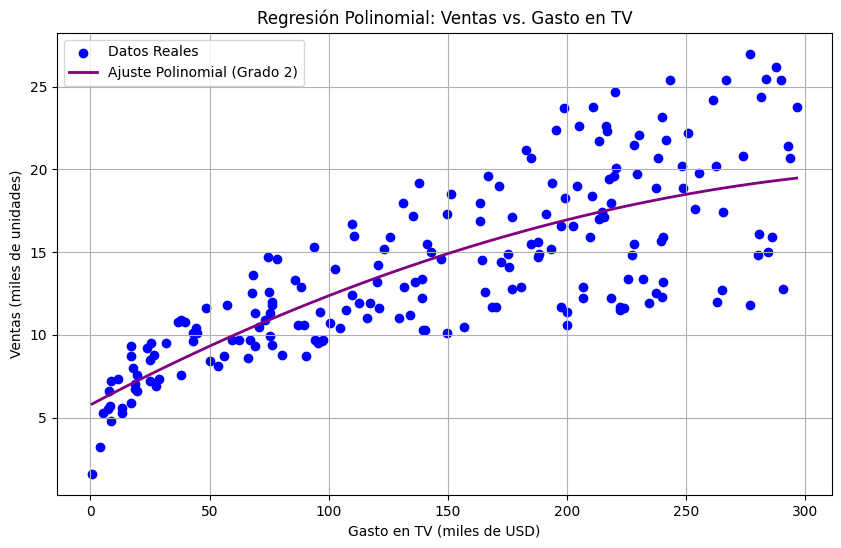

In [9]:
# Usaremos un Pipeline para simplificar los pasos de transformaci√≥n y modelado
# Grado del polinomio
degree = 2

# 1. Crear el pipeline
# Paso 1: Generar caracter√≠sticas polinomiales (1, TV, TV^2)
# Paso 2: Ajustar un modelo lineal a esas caracter√≠sticas
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('lin_reg', LinearRegression())
])

# Usaremos las mismas variables X e y del modelo simple
pipeline.fit(X_train, y_train)

# 2. Evaluar el modelo
y_pred_poly = pipeline.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"R¬≤ del modelo simple (TV): {r2_simple:.4f}")
print(f"R¬≤ del modelo polinomial (Grado 2 en TV): {r2_poly:.4f}")

# 3. Visualizar el resultado
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = pipeline.predict(X_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.plot(X_range, y_range_pred, color='purple', linewidth=2, label=f'Ajuste Polinomial (Grado {degree})')
plt.title('Regresi√≥n Polinomial: Ventas vs. Gasto en TV')
plt.xlabel('Gasto en TV (miles de USD)')
plt.ylabel('Ventas (miles de unidades)')
plt.legend()
plt.grid(True)
plt.show()

### ‚ò¢Ô∏è **Peligro: ¬°Sobreajuste (Overfitting)\!**

¬øQu√© pasa si usamos un grado de polinomio muy alto?


C:\Users\16079220\AppData\Local\anaconda3\envs\learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


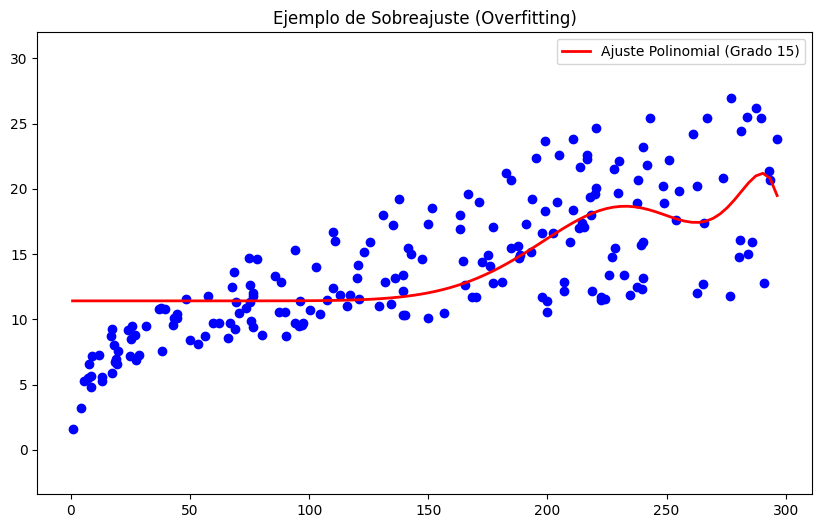

In [10]:
# Ajustemos un modelo de grado 15
degree_overfit = 15
pipeline_overfit = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree_overfit, include_bias=False)),
    ('lin_reg', LinearRegression())
])
pipeline_overfit.fit(X_train, y_train)

# Visualizar el sobreajuste
y_range_overfit = pipeline_overfit.predict(X_range)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X_range, y_range_overfit, color='red', linewidth=2, label=f'Ajuste Polinomial (Grado {degree_overfit})')
plt.title('Ejemplo de Sobreajuste (Overfitting)')
plt.ylim(y.min()-5, y.max()+5) # Ajustar el eje y para ver la curva
plt.legend()
plt.show()

### ü§î **Preguntas para Discusi√≥n:**

1.  Al pasar de un modelo lineal simple a uno polinomial de grado 2, el R¬≤ mejor√≥ ligeramente. ¬øQu√© nos dice esto sobre la naturaleza de la relaci√≥n entre `TV` y `Sales`?
2.  Observa el gr√°fico del modelo de grado 15. Describe con tus propias palabras qu√© est√° haciendo el modelo y por qu√© ser√≠a terrible para predecir las ventas de un nuevo presupuesto de publicidad.
3.  El grado del polinomio es un par√°metro que nosotros elegimos antes de entrenar (no lo aprende el modelo). ¬øC√≥mo se llama este tipo de par√°metro en Machine Learning?